In [2]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go 

import plotly.express as px 
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
from PIL import Image

In [3]:
# Reading the relevant data
tourism_data=pd.read_csv('../data/tourism_viz_data.csv')
tourism_data.head()



host_country country_code  year  tourism_arrivals host
0     Korea, Rep.          KOR  1995      3.753000e+06   No
1   United States          USA  1995      7.973200e+07   No
2  United Kingdom          GBR  1995      2.353700e+07   No
3          France          FRA  1995      1.900326e+08   No
4           Italy          ITA  1995      5.570600e+07   No

In [4]:
#Filter out all the countries thathave hosted olympics from 1995-2020
host_countries=list(tourism_data[tourism_data.host=='Yes'].host_country)
new_data = tourism_data.loc[tourism_data['host_country'].isin(host_countries)] 

In [5]:
##Converting the number of people entering the countries into millions
new_data['tourism_arrivals']= new_data['tourism_arrivals']/1000000
new_data.head()

/var/folders/rk/xq5b7cvx6gz6p8ytm9p2r5s40000gq/T/ipykernel_16809/677046333.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



host_country country_code  year  tourism_arrivals host
1   United States          USA  1995            79.732   No
2  United Kingdom          GBR  1995            23.537   No
5           Japan          JPN  1995             3.345   No
6       Australia          AUS  1995             3.726   No
9           China          CHN  1995            46.387   No

In [6]:
##Plotting a line to indicate increase or decrease
fig=px.line(
    new_data, 
    x = 'year',
    y = 'tourism_arrivals',
    color='country_code',
    
    color_discrete_map={"USA": '#ff0000',"GBR":'#3e76ec',"JPN":"#ffce01","AUS":"#179a13","CHN":"#ffce01","GRC":'#3e76ec','BRA':'#ff0000'}
    
)

In [7]:
#Plotting a scatter plot 
fig1 = px.scatter(x=[1996,2000,2004,2008,2012,2016,2020], y=[82.756000,4.931000,14.268000,130.027000,32.221000,6.547000,4.115799])

In [8]:
#Appeending both the visuals
fig3 = go.Figure(data=fig.data + fig1.data)

In [9]:
torch = Image.open("../data/pictures/olympics_torch.png")
rings = Image.open("../data/pictures/olympicrings.png")

In [10]:
##Annotating photos on the years a country has hosted
for x,y in zip(fig1.data[0].x, fig1.data[0].y):
    fig3=fig3.add_layout_image(
        x=x,
        y=y,
        source=torch,
        xref="x",
        yref="y",
        sizex=15,
        sizey=15,
        xanchor="center",
        yanchor="middle",
    )


add x and y labels
remove grid
change line colors to continent colors
add title



In [11]:
fig3=fig3.update_layout(title="Tourism Indicators across the Years <br><i>A comparison with Olympic Hosts</i>",
        title_font_family="Arial",

        paper_bgcolor='#E7E6E1',
        plot_bgcolor='#E7E6E1')
fig3=fig3.update_layout(xaxis=dict(title='Years',showgrid=False,title_font_color='black',tickfont=dict(family='Helvetica', size=10, color='black')),
              yaxis=dict(title='Number of Arrivals (In Millions)',showgrid=False,title_font_color='black',tickfont=dict(family='Helvetica', size=10, color='black')),
              title_font_color='black',
              legend=dict(font=dict(
            family="Helvetica",
            size=12,
            color="black"
        ))
              

)



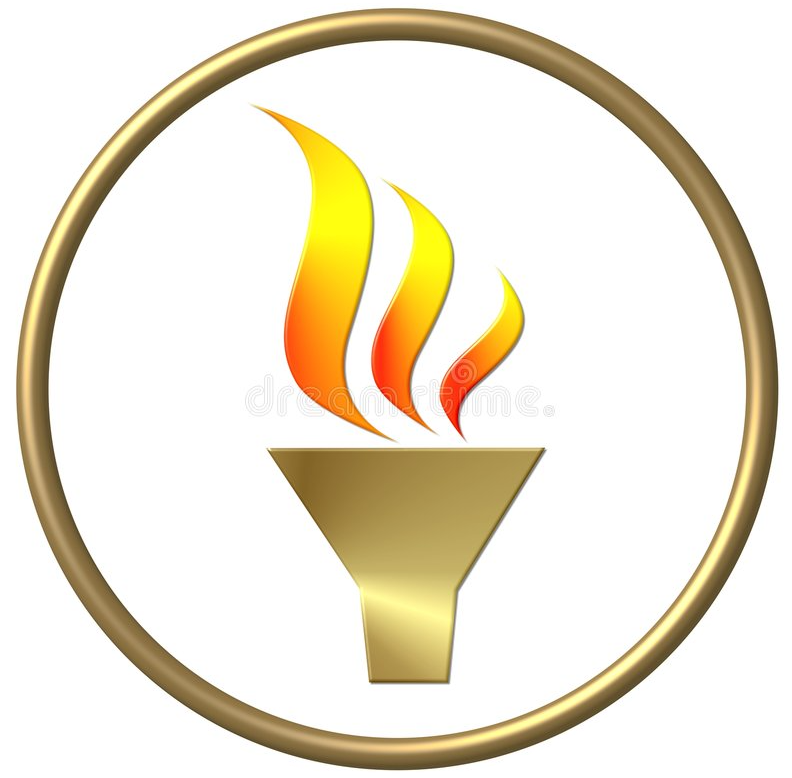
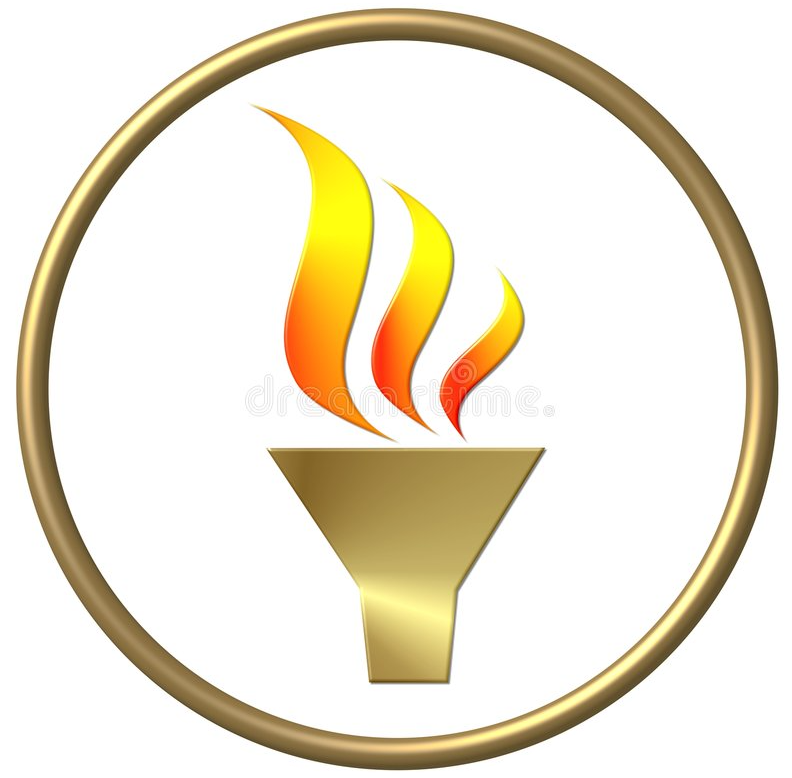
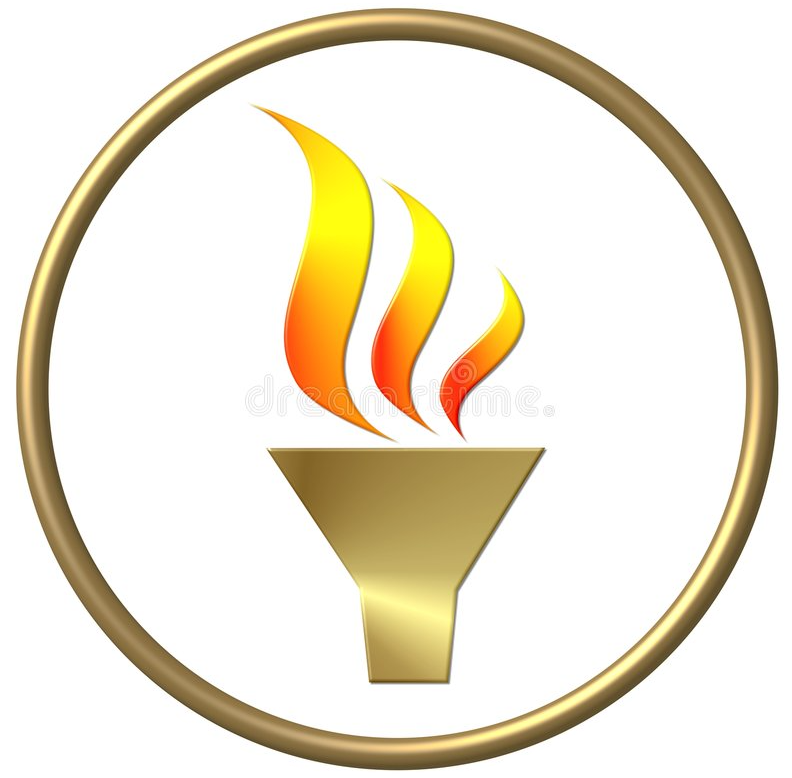
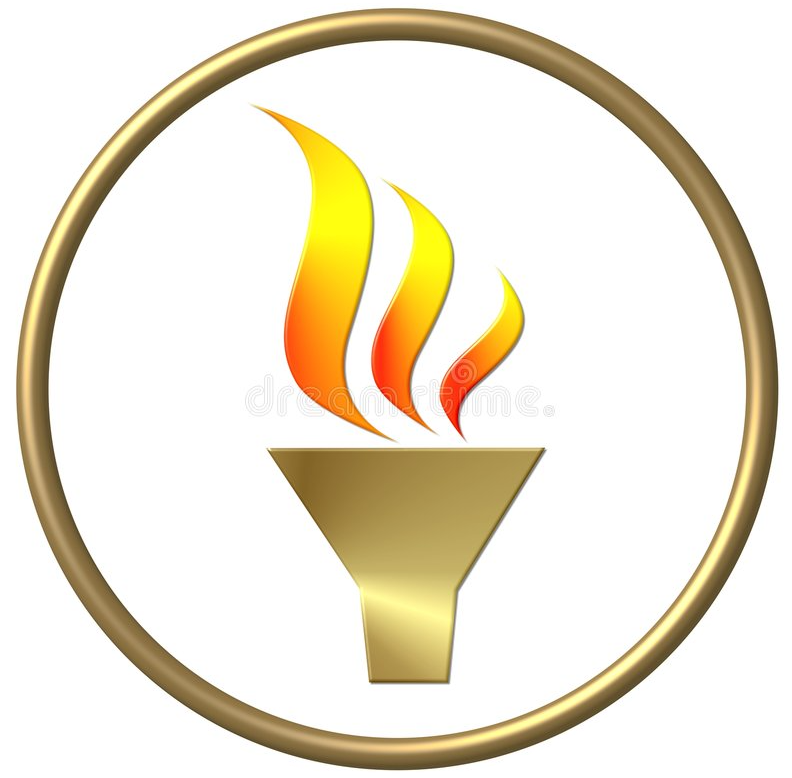
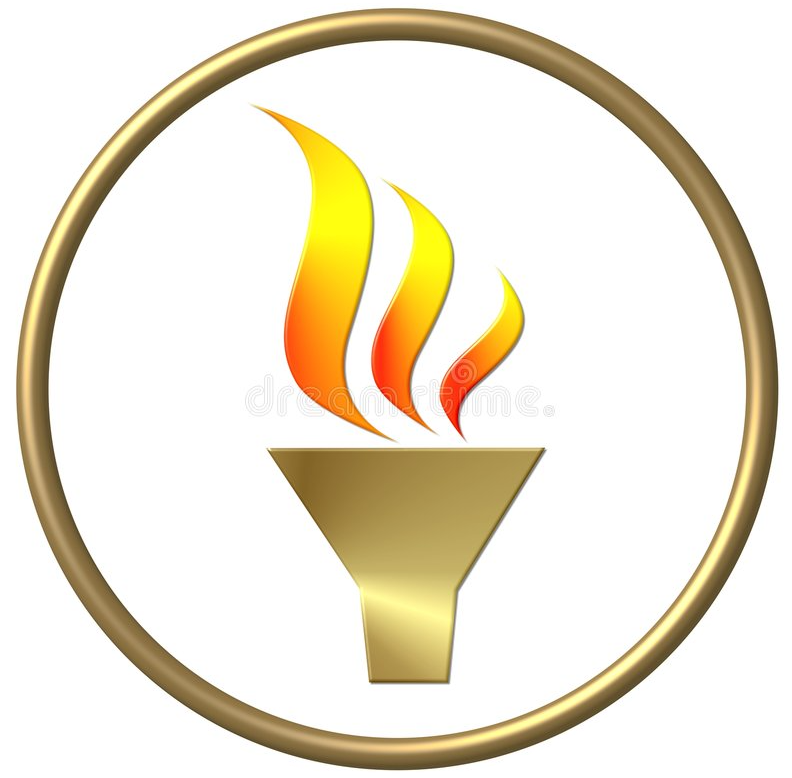
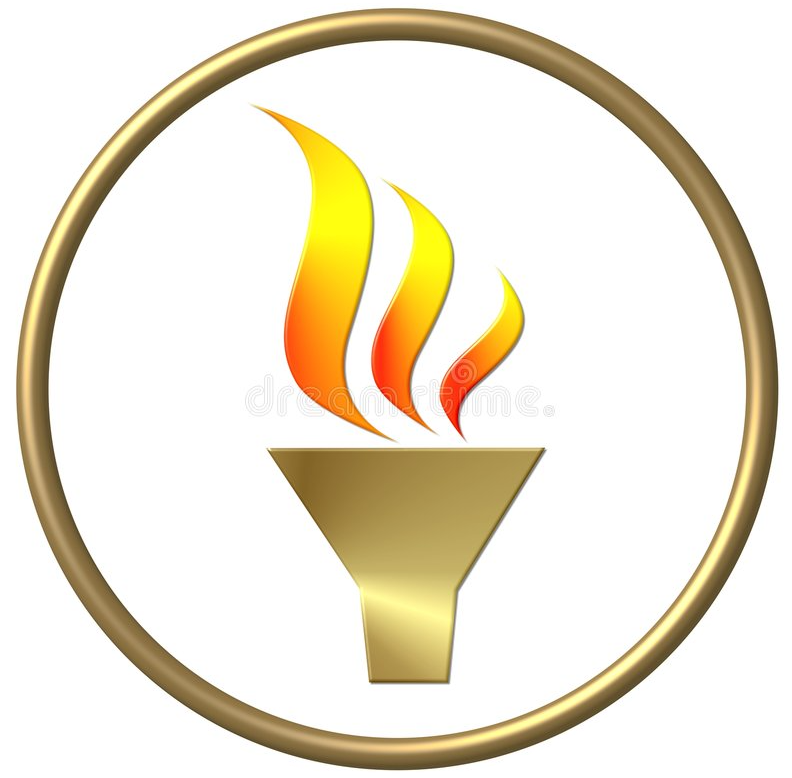
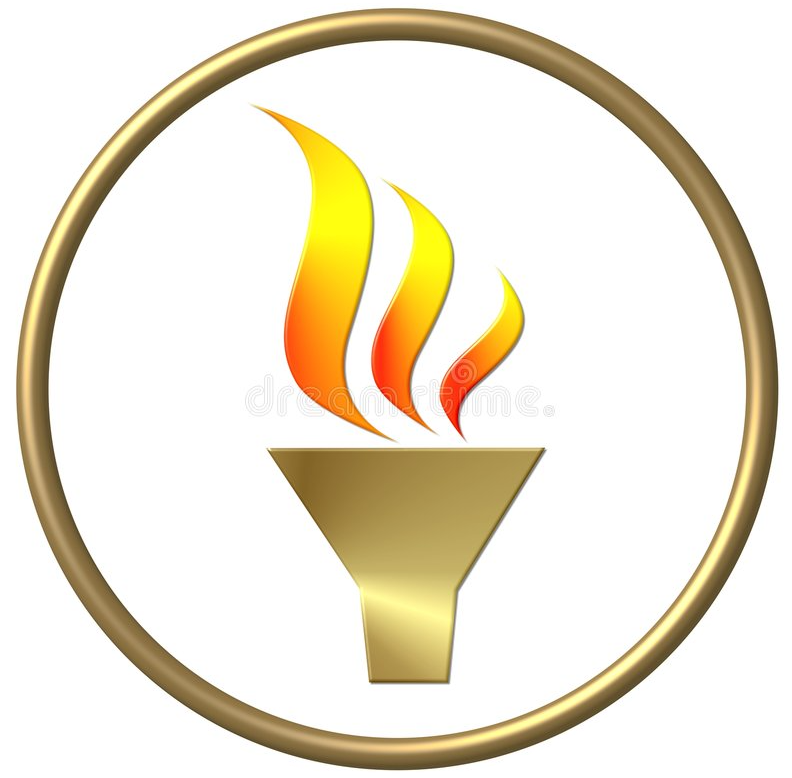
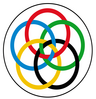

In [12]:
fig3.add_layout_image(
    dict(
        source=rings,
        xref="paper", yref="paper",
        x=1, y=1,
        sizex=0., sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)




In [13]:
fig3=fig3.add_layout_image(
        x=1996,
        y=180,
        source=torch,
        xref="x",
        yref="y",
        sizex=20,
        sizey=20,
        xanchor="center",
        yanchor="middle",
    )
fig3=fig3.add_annotation(x=1997.25, y=175,
            text="<b>HOST</b>",
            showarrow=False,
            yshift=10,
            font = dict( color = 'black',
                              family = 'sans serif',
                              size = 12))


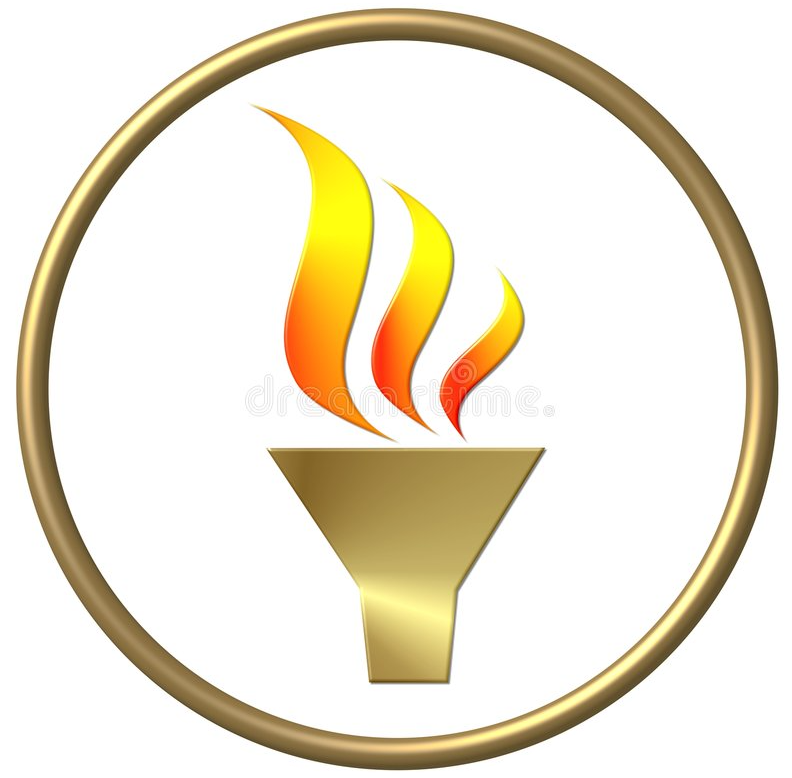
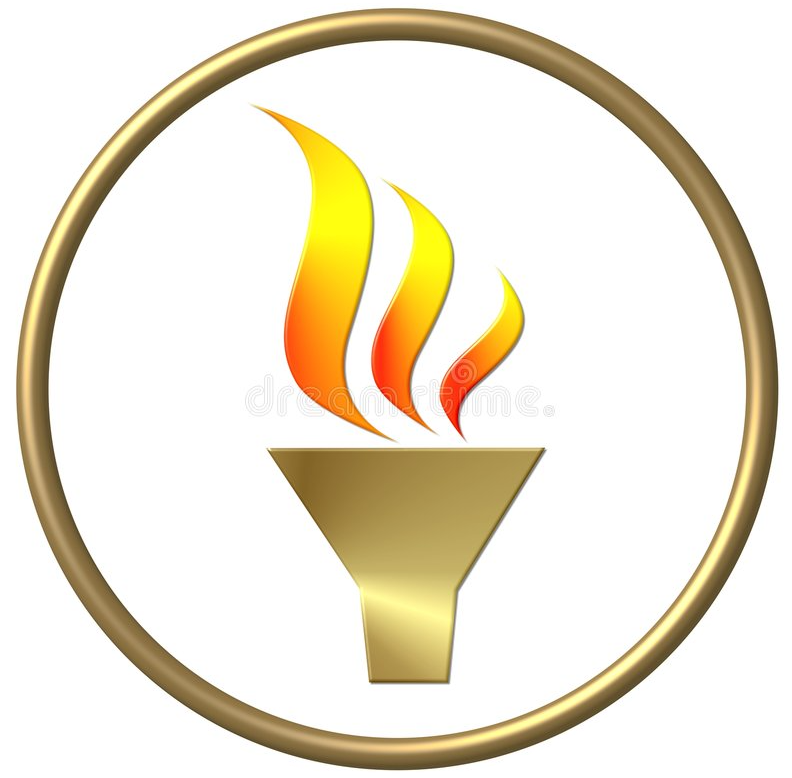
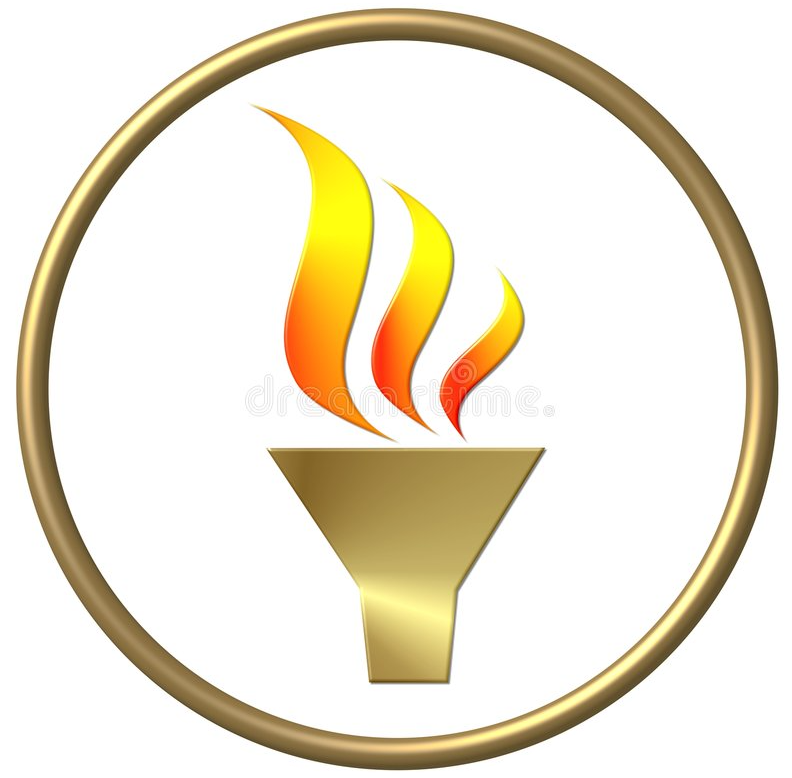
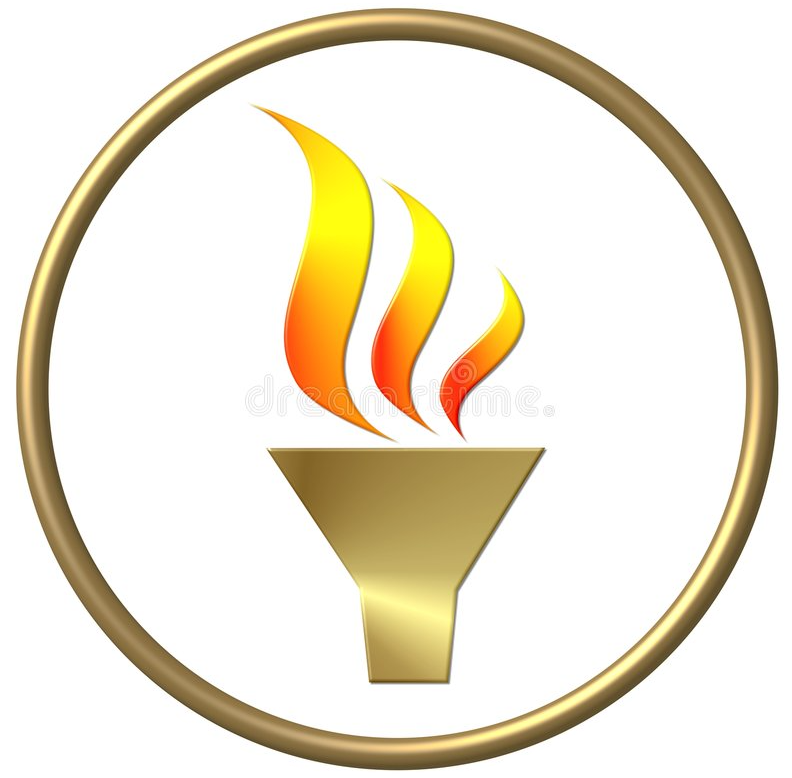
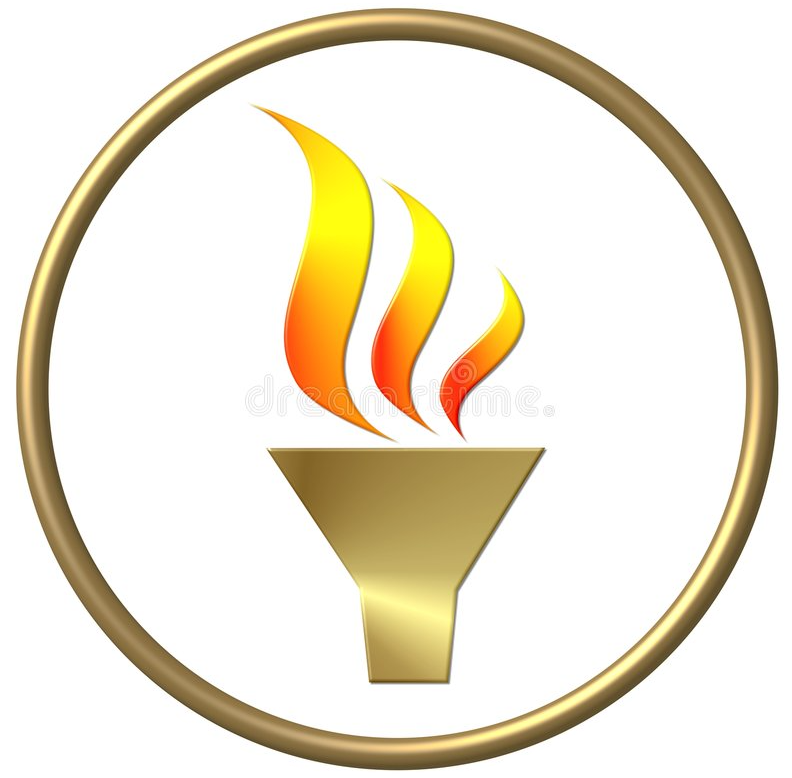
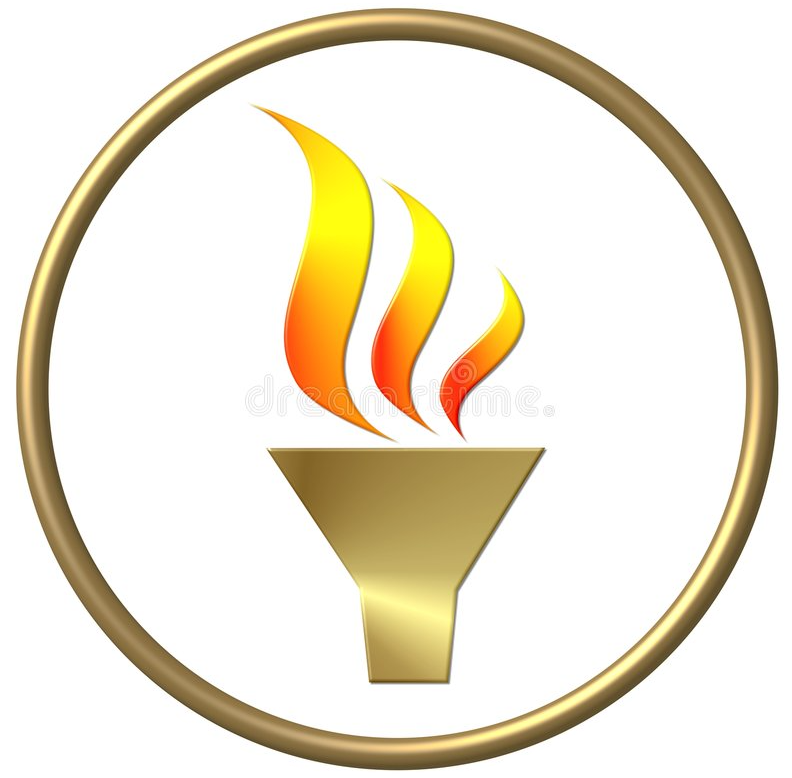
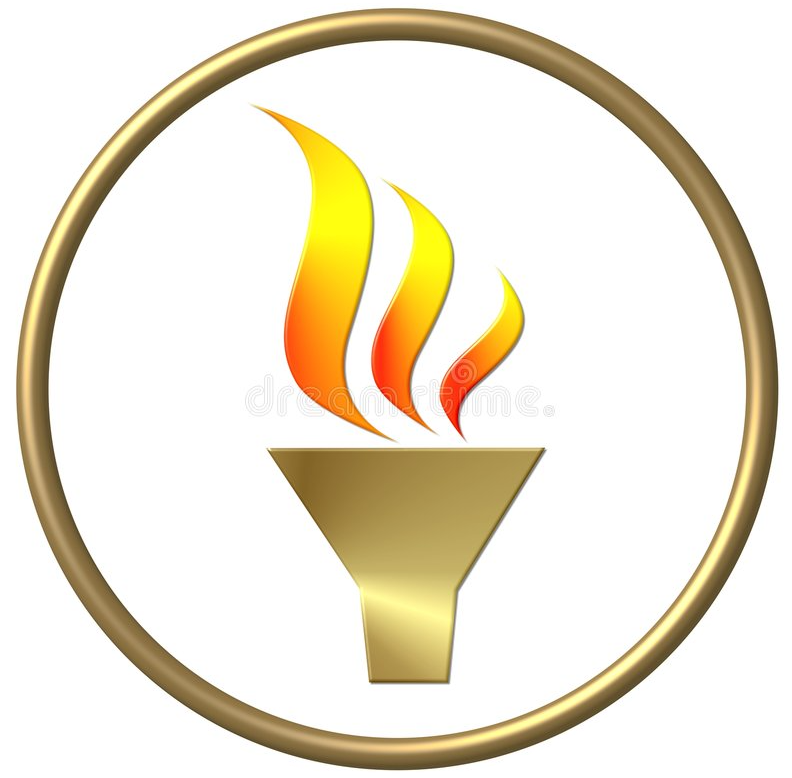
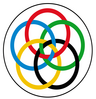
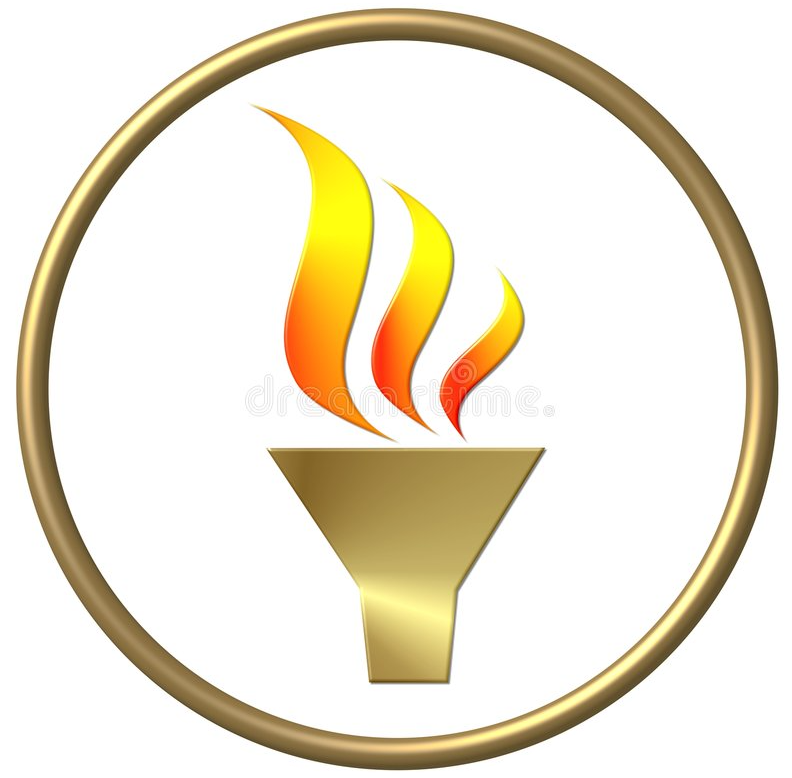

In [14]:
fig3.show()

In [15]:
fig3.write_html("../plots/tourism_indicators.html")